# **Regresores para hallar Indice SARA**

Saturados, Aromaticos, Resinas, Asfaltenos
### SVR y PLS
Agregando ciclo for al random state y a componentes

## **Importe Librerias**


In [1]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
import openpyxl
import sklearn
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression



#Librerias Metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
###############################################



#Graficas
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [2]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiento Datos**


In [3]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe
dt_Supp_spect.head() #print dt frame

,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#se eliminan estos features, porque no se encuentran registrados en el target
dt_Supp_spect.drop(['Molecules\Samples','CR3', 'CR20', 'CR21','VR3'], axis=1, inplace=True)#Eliminar muestras no disponibles en las propiedades a predecir
print('shape: ',dt_Supp_spect.shape)
dt_Supp_spect.head() #print dt frame

shape:  (59692, 36)


,CR1,CR2,CR4,CR5,CR6,CR7,CR8,CR9,CR10,CR11,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,16.122,28.754,24.784,2.360,2.252,2.612,2.020,17.854,15.985,14.704,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.101,35.596,36.845,10.718,7.076,10.005,11.003,35.712,28.735,20.846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.500,54.152,55.708,25.710,16.029,22.088,28.136,50.344,41.754,38.228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.574,43.425,41.362,43.697,36.075,39.573,46.366,35.953,30.995,53.734,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.324,62.510,57.982,37.720,24.171,25.059,41.800,63.023,40.590,40.347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Dataframe Supplementary_CCR_spectra transpose
dt_spec_Transpose = dt_Supp_spect.transpose()
print(dt_spec_Transpose.shape)
dt_spec_Transpose=dt_spec_Transpose.astype('float')
dt_spec_Transpose = dt_spec_Transpose.loc[:, (dt_spec_Transpose != 0).any(axis=0)] ##eliminar columnas 0
print(dt_spec_Transpose.shape)
dt_spec_Transpose.head(41)


(36, 59692)
(36, 54357)


,0,1,2,3,4,5,6,7,8,9,...,59680,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.500,31.574,52.324,23.838,65.693,47.620,49.053,64.986,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR2,28.754,35.596,54.152,43.425,62.510,37.521,82.040,73.056,66.248,86.506,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.940,60.110,67.817,79.501,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR5,2.360,10.718,25.710,43.697,37.720,29.929,56.975,26.378,83.384,80.180,...,2.572,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR6,2.252,7.076,16.029,36.075,24.171,47.137,46.952,48.978,58.504,56.834,...,0.000,1.528,1.728,1.702,1.521,1.506,2.188,0.000,0.000,0.000
CR7,2.612,10.005,22.088,39.573,25.059,43.698,51.550,43.905,63.517,54.516,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.299,2.354,2.223
CR8,2.020,11.003,28.136,46.366,41.800,30.415,53.800,29.205,77.326,76.793,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR9,17.854,35.712,50.344,35.953,63.023,29.398,69.367,58.145,73.410,82.545,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR10,15.985,28.735,41.754,30.995,40.590,28.725,54.259,52.429,53.938,57.728,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
CR11,14.704,20.846,38.228,53.734,40.347,46.483,58.512,52.152,74.105,81.809,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [6]:
#import target (SARA) 40 muestras (masas)(Crudos, Fondos/Vacios y Gases)
#Dataframe Supplementary_CCR_properties
dt_Propiedad_SARA = pd.read_csv('Data/Crudos_Fondos_Propiedades_NombresyEtiquetas.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Propiedad_SARA.shape)
dt_Propiedad_SARA.head()#print dt frame

shape:  (35, 44)


,Unnamed: 0,27020 rub,6607lis1,cdotk,007847pal,ch971,nut35,sn120,c801,0304v1,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,cse
0,NaN,S1,S2,S4,NaN,S5,S6,S7,S8,S9,...,FV13,FV14,FV15,FV16,FV17,FV18,FV19,NaN,NaN,NaN
1,NaN,Rubiales,Lisama 165,Teca 62,Palagua,Chichimene 97,Nutria 35,Santos 120,Castilla 80,Vasconia-Tropomix,...,Trasgo 1,Aullador 1 DST2,Tisquirama 7,San Francisco 17,Mezcla parafínica,San Fernando,Andalucia sur 10,Tesoro 43,San Roque 3,CSE
2,NaN,200789673,200826607,200866254,201010735,200820720,200825159,200825157,200823420,200798220,...,200817187,200898545,200873436,#REF!,#REF!,200939838,200885472,#REF!,200885486,NaN
3,NaN,CRUDO,CRUDO,CRUDO*,CRUDO,CRUDO,CRUDO,CRUDO,CRUDO*,CRUDO,...,FON,FON,FON,FON,FON,FON,FON,FON,FON,NaN
4,ANALISIS,°C,°C,°C,°C,°C,°C,°C,°C,°C,...,530+,530+,530.+,545+,521.5+,533+,539+,548+,512.2+,NaN


In [7]:
dt_Propiedad_SARA.drop(dt_Propiedad_SARA.loc[1:30].index, inplace=True)

In [8]:
dt_Propiedad_SARA=dt_Propiedad_SARA.transpose()
dt_Propiedad_SARA

,0,31,32,33,34
Unnamed: 0,NaN,Saturados (%w),Aromáticos (%w),Resinas (%w),Asfaltenos (%w)
27020 rub,S1,33.88,34.12,8.78,11.59
6607lis1,S2,31.0,35.7,13.4,0.8
cdotk,S4,25.0,39.7,21.5,2.5
007847pal,NaN,33.6,33.5,27.1,1.1
ch971,S5,12.9,40.9,19.4,17.3
nut35,S6,30.2,19.3,11.2,3.2
sn120,S7,28.1,30.8,14.1,3.1
c801,S8,21.5,36.9,15.3,14.4
0304v1,S9,33.1,30.3,10.2,6.3


In [9]:
#se eliminan estos valores, porque salen del espectro Sn, Fn (no necesariamente nulos)
dt_Propiedad_SARA = dt_Propiedad_SARA.drop(dt_Propiedad_SARA.index[[0,4,11,17,18,41,42,43]])
print(dt_Propiedad_SARA.shape)
dt_Propiedad_SARA

(36, 5)


,0,31,32,33,34
27020 rub,S1,33.88,34.12,8.78,11.59
6607lis1,S2,31.0,35.7,13.4,0.8
cdotk,S4,25.0,39.7,21.5,2.5
ch971,S5,12.9,40.9,19.4,17.3
nut35,S6,30.2,19.3,11.2,3.2
sn120,S7,28.1,30.8,14.1,3.1
c801,S8,21.5,36.9,15.3,14.4
0304v1,S9,33.1,30.3,10.2,6.3
3049m-1041,S10,20.4,31.2,21.8,8.0
48459 f1,S11,36.62,33.69,9.96,9.78


In [10]:
#Definimos las moleculas como Features
dt_features= dt_spec_Transpose.to_numpy() #Variables predictoras


#Definimos SARA como Target
dt_targetSaturado=dt_Propiedad_SARA[31].to_numpy() #Variable Objetivo
dt_targetSaturado=dt_targetSaturado.astype('float')

dt_targetAromatico=dt_Propiedad_SARA[32].to_numpy() #Variable Objetivo
dt_targetAromatico=dt_targetAromatico.astype('float')

dt_targetResinas=dt_Propiedad_SARA[33].to_numpy()  #Variable Objetivo
dt_targetResinas=dt_targetResinas.astype('float')

dt_targetAsfaltenos=dt_Propiedad_SARA[34].to_numpy()  #Variable Objetivo
dt_targetAsfaltenos=dt_targetAsfaltenos.astype('float')



#Normalizacion de datos
dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos
###################################################

print(dt_features.shape)
print(dt_targetSaturado.shape)


(36, 54357)
(36,)


In [26]:
pca=PCA(n_components=8) #
pca.fit(dt_features) # obtener los componentes principales
datos_pca=pca.transform(dt_features) # convertimos nuestros datos con las nuevas dimensiones de PCA
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca)

(36, 8)
<class 'numpy.ndarray'>
[[ 4.35501741e-01 -1.12657452e-01  4.02630667e-02  1.36407293e-02
  -8.35818488e-02 -7.84307381e-03 -3.50967377e-02  8.78702000e-03]
 [ 3.82183021e-01 -8.54268166e-02 -4.50563229e-02 -3.40889601e-02
  -6.66830478e-02  4.74274718e-03 -3.30393083e-02 -2.02603136e-02]
 [ 5.00760563e-01 -2.54752693e-02  4.81294947e-02  9.66191007e-02
  -2.64603809e-02 -5.85088658e-02  3.56785426e-02 -2.38702798e-02]
 [ 3.93674617e-01  1.69912861e-01  1.57479718e-01  4.92086192e-02
   6.97307540e-02  6.74824358e-02 -4.41313719e-02  1.73181221e-02]
 [ 3.24604768e-01 -7.81411735e-02 -1.80196627e-01 -5.44395007e-02
  -1.62956909e-02  8.03700034e-02  4.60733757e-02  3.47476669e-02]
 [ 3.47037186e-01  1.42838707e-02 -1.26714323e-01 -2.84387260e-02
   9.74318549e-03  6.58177057e-02  5.04015998e-02 -4.61213834e-03]
 [ 4.31464284e-01  6.16947190e-02  1.35932007e-01  2.82451631e-02
   1.53925471e-02  2.99429086e-02 -3.35848194e-02  2.70995682e-02]
 [ 4.09423528e-01 -9.86886421e-02  6.

In [27]:
# Crear DataFrame de datos PCA
datos_pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

# Ahora puedes imprimirlo de manera similar
print(datos_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.435502 -0.112657  0.040263  0.013641 -0.083582 -0.007843 -0.035097   
1  0.382183 -0.085427 -0.045056 -0.034089 -0.066683  0.004743 -0.033039   
2  0.500761 -0.025475  0.048129  0.096619 -0.026460 -0.058509  0.035679   
3  0.393675  0.169913  0.157480  0.049209  0.069731  0.067482 -0.044131   
4  0.324605 -0.078141 -0.180197 -0.054440 -0.016296  0.080370  0.046073   

        PC8  
0  0.008787  
1 -0.020260  
2 -0.023870  
3  0.017318  
4  0.034748  


In [28]:
dt_features = datos_pca
print(dt_features)

[[ 4.35501741e-01 -1.12657452e-01  4.02630667e-02  1.36407293e-02
  -8.35818488e-02 -7.84307381e-03 -3.50967377e-02  8.78702000e-03]
 [ 3.82183021e-01 -8.54268166e-02 -4.50563229e-02 -3.40889601e-02
  -6.66830478e-02  4.74274718e-03 -3.30393083e-02 -2.02603136e-02]
 [ 5.00760563e-01 -2.54752693e-02  4.81294947e-02  9.66191007e-02
  -2.64603809e-02 -5.85088658e-02  3.56785426e-02 -2.38702798e-02]
 [ 3.93674617e-01  1.69912861e-01  1.57479718e-01  4.92086192e-02
   6.97307540e-02  6.74824358e-02 -4.41313719e-02  1.73181221e-02]
 [ 3.24604768e-01 -7.81411735e-02 -1.80196627e-01 -5.44395007e-02
  -1.62956909e-02  8.03700034e-02  4.60733757e-02  3.47476669e-02]
 [ 3.47037186e-01  1.42838707e-02 -1.26714323e-01 -2.84387260e-02
   9.74318549e-03  6.58177057e-02  5.04015998e-02 -4.61213834e-03]
 [ 4.31464284e-01  6.16947190e-02  1.35932007e-01  2.82451631e-02
   1.53925471e-02  2.99429086e-02 -3.35848194e-02  2.70995682e-02]
 [ 4.09423528e-01 -9.86886421e-02  6.66587621e-02 -4.97402643e-02
  -

# **Aplicacion Modelos ML**

In [106]:
# Creación del modelo SVR
# ==============================================================================
modeloSVR = SVR(C = 50, kernel = 'poly', degree=2)
modeloPLS = PLSRegression(n_components=2)

### <span style="color:Blue">Predicciones Saturados </span>

In [107]:
#Target Saturados

bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetSaturado, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [108]:
print('RandomState ideal r2 SVR = ',np.argmax(bestR2SVR))# Random state ideal
print('ErrorR2SVR= ',np.max(bestR2SVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal r2 PLS = ',np.argmax(bestR2PLS))# Random state ideal
print('ErrorR2PLS= ',np.max(bestR2PLS)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE SVR = ',np.argmin(bestErrorSVR))# Random state ideal
print('ErrorMSESVR= ',np.min(bestErrorSVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE PLS = ',np.argmin(bestErrorPLS))# Random state ideal
print('ErrorMSEPLS= ',np.min(bestErrorPLS)) # Valor en dicho random state

RandomState ideal r2 SVR =  386
ErrorR2SVR=  0.7122308084207829
#######################################################################
RandomState ideal r2 PLS =  443
ErrorR2PLS=  0.9095447656211342
#######################################################################
RandomState ideal MSE SVR =  386
ErrorMSESVR=  23.07292910539597
#######################################################################
RandomState ideal MSE PLS =  443
ErrorMSEPLS=  11.188407940321914


In [109]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor MSE
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetSaturado, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

#=====================================================
#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

ErrorMedioCuadrado SVR=  23.07292910539597
ErrorMedioCuadrado PLS=  29.829700346171727
r2error SVR=  0.7122308084207829
r2error PLS=  0.6279592974755593


In [110]:
#Graficas Saturados

In [111]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesSVR_train
y_pred_test=prediccionesSVR

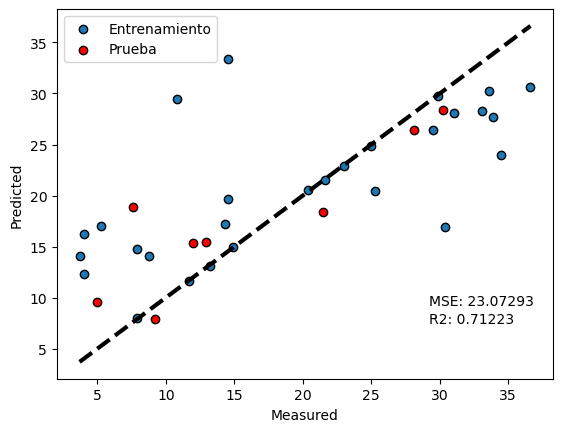

In [112]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2SVR:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')
plt.show()

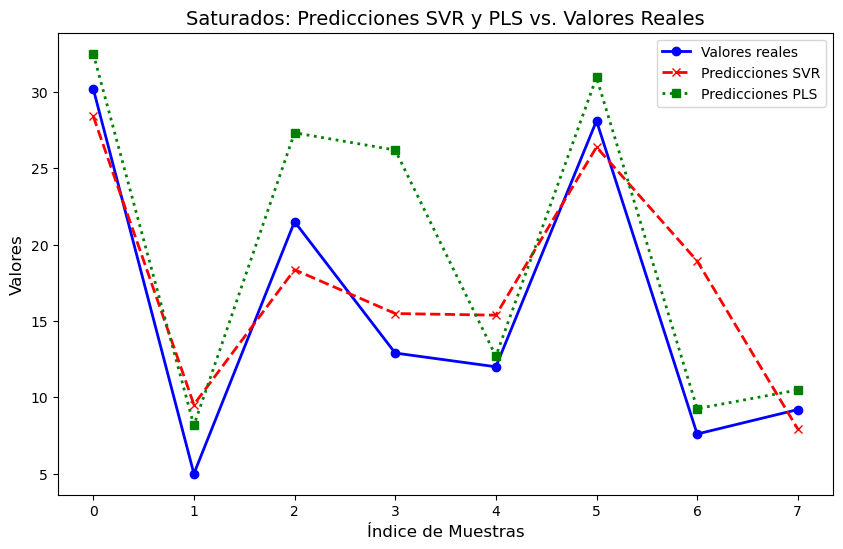

In [113]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Saturados: Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/SaturadosPredSVRPLS.png")


# Mostrar gráfico
plt.show()

In [114]:
from joblib import dump
dump(modeloSVR, 'Regresion_Saturados_SVR.pkl')

['Regresion_Saturados_SVR.pkl']

## <span style="color:Blue">Predicciones Aromaticos </span>

In [115]:
#Target Aromaticos

bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetAromatico, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)    

    #Predict Models    
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [116]:
print('RandomState ideal r2 SVR = ',np.argmax(bestR2SVR))# Random state ideal
print('ErrorR2SVR= ',np.max(bestR2SVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal r2 PLS = ',np.argmax(bestR2PLS))# Random state ideal
print('ErrorR2PLS= ',np.max(bestR2PLS)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE SVR = ',np.argmin(bestErrorSVR))# Random state ideal
print('ErrorMSESVR= ',np.min(bestErrorSVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE PLS = ',np.argmin(bestErrorPLS))# Random state ideal
print('ErrorMSEPLS= ',np.min(bestErrorPLS)) # Valor en dicho random state

RandomState ideal r2 SVR =  738
ErrorR2SVR=  0.4021457201444041
#######################################################################
RandomState ideal r2 PLS =  807
ErrorR2PLS=  0.6214845333205236
#######################################################################
RandomState ideal MSE SVR =  23
ErrorMSESVR=  14.687494861576614
#######################################################################
RandomState ideal MSE PLS =  139
ErrorMSEPLS=  9.122957216324599


In [117]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor MSE
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetAromatico, train_size= 0.8,random_state =np.argmax(bestR2PLS)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

#=====================================================
#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

ErrorMedioCuadrado SVR=  58.69172599915951
ErrorMedioCuadrado PLS=  32.89083415056476
r2error SVR=  0.32456179265327745
r2error PLS=  0.6214845333205236


In [118]:
#Grafico Aromaticos

In [119]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesSVR_train
y_pred_test=prediccionesSVR

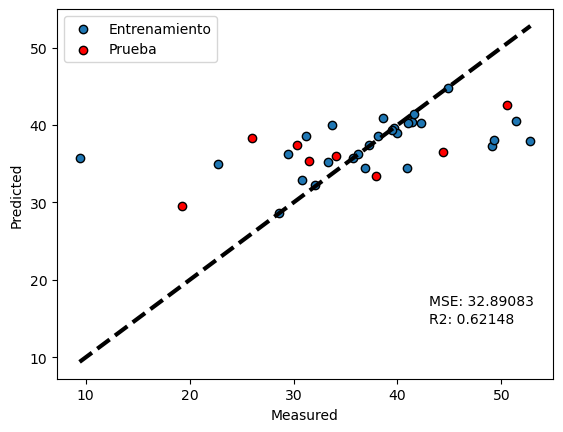

In [121]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_LPS:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2PLS:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')
plt.show()

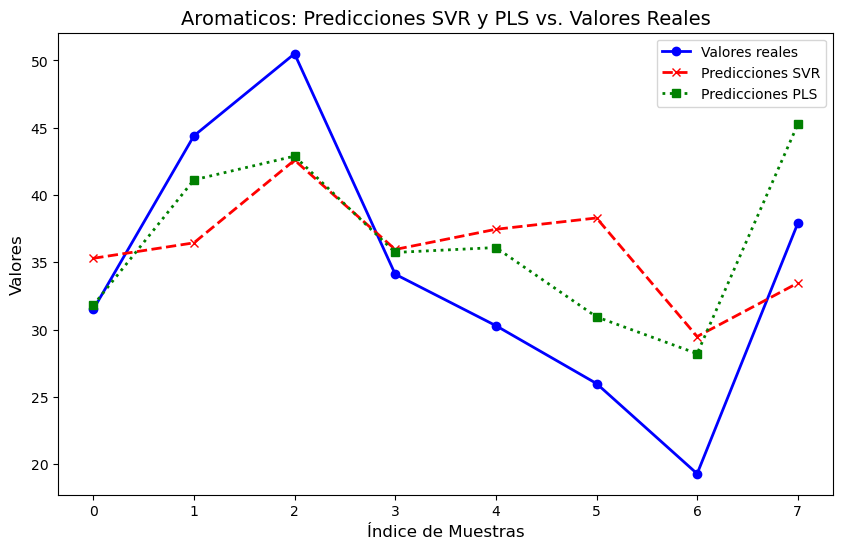

In [122]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Aromaticos: Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/AromaticosPredSVRPLS.png")


# Mostrar gráfico
plt.show()

In [123]:
from joblib import dump
dump(modeloPLS, 'Regresion_Aromaticos_PLS.pkl')

['Regresion_Aromaticos_PLS.pkl']

### <span style="color:Blue">Predicciones Resinas </span>

In [124]:
#Target Resinas

bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetResinas, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [125]:
print('RandomState ideal r2 SVR = ',np.argmax(bestR2SVR))# Random state ideal
print('ErrorR2SVR= ',np.max(bestR2SVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal r2 PLS = ',np.argmax(bestR2PLS))# Random state ideal
print('ErrorR2PLS= ',np.max(bestR2PLS)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE SVR = ',np.argmin(bestErrorSVR))# Random state ideal
print('ErrorMSESVR= ',np.min(bestErrorSVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE PLS = ',np.argmin(bestErrorPLS))# Random state ideal
print('ErrorMSEPLS= ',np.min(bestErrorPLS)) # Valor en dicho random state

RandomState ideal r2 SVR =  386
ErrorR2SVR=  0.44639624204252404
#######################################################################
RandomState ideal r2 PLS =  627
ErrorR2PLS=  0.9176736269238821
#######################################################################
RandomState ideal MSE SVR =  798
ErrorMSESVR=  27.990461366632857
#######################################################################
RandomState ideal MSE PLS =  627
ErrorMSEPLS=  4.859725802683238


In [126]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor MSE
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetResinas, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train) 

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

#=====================================================
#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

ErrorMedioCuadrado SVR=  45.96399001146562
ErrorMedioCuadrado PLS=  35.00306739999019
r2error SVR=  0.44639624204252404
r2error PLS=  0.5784128042878864


In [127]:
# Graficas Resinas

In [128]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesSVR_train
y_pred_test=prediccionesSVR

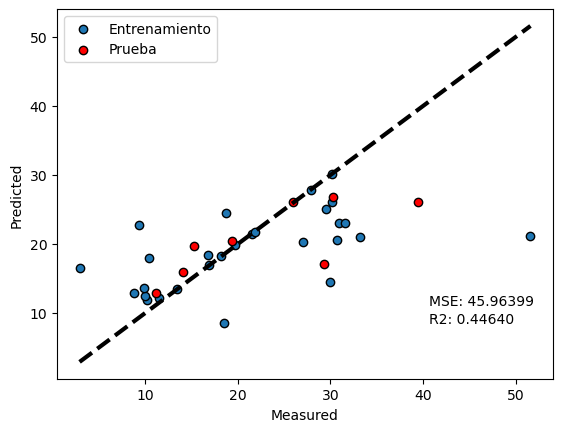

In [129]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2SVR:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')
plt.show()

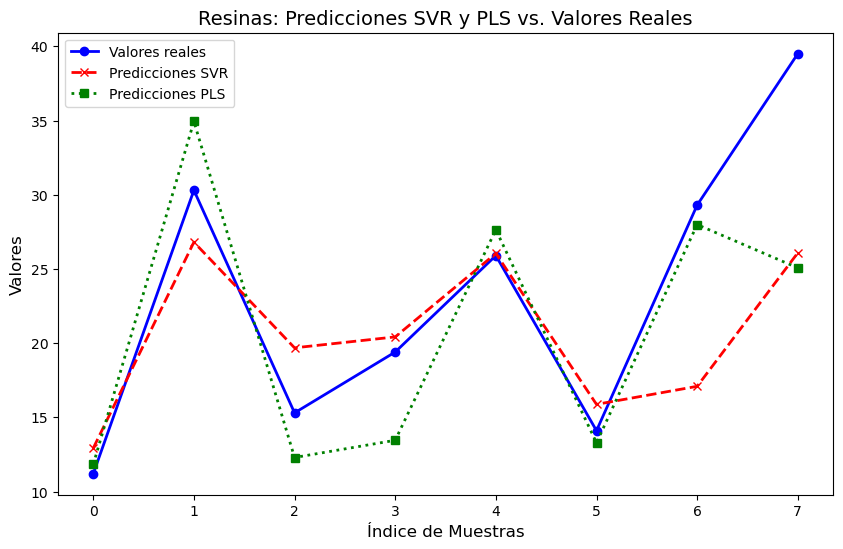

In [130]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Resinas: Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/ResinasPredSVRPLS.png")


# Mostrar gráfico
plt.show()

In [131]:
from joblib import dump
dump(modeloSVR, 'Regresion_Resinas_SVR.pkl')

['Regresion_Resinas_SVR.pkl']

### <span style="color:Blue"> Predicciones Asfaltenos </span>

In [132]:
#Target Asfaltenos

bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetAsfaltenos, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [133]:
print('RandomState ideal r2 SVR = ',np.argmax(bestR2SVR))# Random state ideal
print('ErrorR2SVR= ',np.max(bestR2SVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal r2 PLS = ',np.argmax(bestR2PLS))# Random state ideal
print('ErrorR2PLS= ',np.max(bestR2PLS)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE SVR = ',np.argmin(bestErrorSVR))# Random state ideal
print('ErrorMSESVR= ',np.min(bestErrorSVR)) # Valor en dicho random state

print('#######################################################################')

print('RandomState ideal MSE PLS = ',np.argmin(bestErrorPLS))# Random state ideal
print('ErrorMSEPLS= ',np.min(bestErrorPLS)) # Valor en dicho random state

RandomState ideal r2 SVR =  139
ErrorR2SVR=  0.6286836077095422
#######################################################################
RandomState ideal r2 PLS =  830
ErrorR2PLS=  0.7973009122630863
#######################################################################
RandomState ideal MSE SVR =  752
ErrorMSESVR=  20.420517830820074
#######################################################################
RandomState ideal MSE PLS =  722
ErrorMSEPLS=  14.878722189663126


In [134]:
#partir conjunto de entrenamiento

#Entrenamiento con el mejor MSE
X_train, X_test, y_train, y_test= train_test_split(dt_features, dt_targetAsfaltenos, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

# ============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)

#=====================================================
#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

ErrorMedioCuadrado SVR=  23.32686624520056
ErrorMedioCuadrado PLS=  24.048446286398306
r2error SVR=  0.6286836077095422
r2error PLS=  0.6171975171721357


In [135]:
# Graficas Asfaltenos

In [136]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesSVR_train
y_pred_test=prediccionesSVR

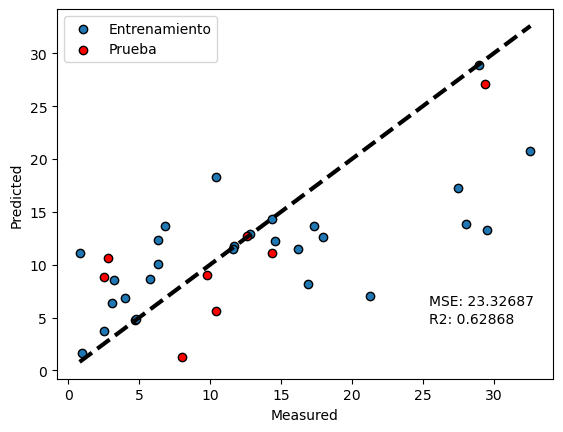

In [137]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2SVR:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper left')
plt.show()

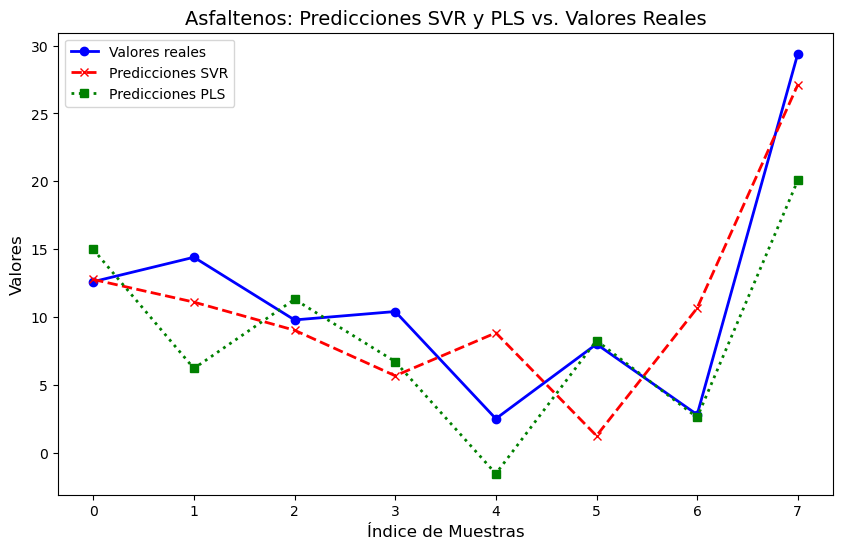

In [138]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Asfaltenos: Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/Asfaltenos.png")


# Mostrar gráfico
plt.show()

In [139]:
from joblib import dump
dump(modeloSVR, 'Regresion_Asfaltenos_SVR.pkl')

['Regresion_Asfaltenos_SVR.pkl']